# Data Science - Wes McKinney: Chapter 4: NumPy Basics: Arrays and Vectorized Computation

Created by Travis Oliphant (2005). Importance of NumPy:
1.  NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.
2. NumPy operations perform complex computations on entire arrays without the
need for Python for loops, which can be slow for large sequences. NumPy is
faster than regular Python code because its C-based algorithms avoid overhead
present with regular interpreted Python code.

In [1]:
import numpy as np

In [2]:
arr = np.arange(1_000_000)
lst = list(range(1_000_000))

In [3]:
%timeit arr2 = 2*arr

1.53 ms ± 621 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%timeit lst2 = [2*x for x in lst]

141 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 4.1 The NumPy ndarray: A Multidimensional Array Object
ndarray: N-dimensional array.

In [5]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
display(data)
display(data * 10)

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

It would be possible to put from numpy import * in your code to avoid
having to write np., but I advise against making a habit of this.
The numpy namespace is large and contains a number of functions
whose names conflict with built-in Python functions (like min and
max). Following standard conventions like these is almost always a
good idea.

In [6]:
print('shape:', data.shape, '\t dtype:', data.dtype)

shape: (2, 3) 	 dtype: float64


### Creating ndarrays

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
display(arr1, arr2)
print(f'ndim: {arr1.ndim},\t shape: {arr1.shape},\t dtype: {arr1.dtype}')
print(f'ndim: {arr2.ndim},\t shape: {arr2.shape},\t dtype: {arr2.dtype}')

array([6. , 7.5, 8. , 0. , 1. ])

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

ndim: 1,	 shape: (5,),	 dtype: float64
ndim: 2,	 shape: (2, 4),	 dtype: int32


In [8]:
display(np.zeros(10), np.zeros((3,5)))
display(np.empty((2,3,4)))
display(np.arange(5))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

array([[[3.56043053e-307, 1.60219306e-306, 7.56571288e-307,
         1.89146896e-307],
        [1.37961302e-306, 1.05699242e-307, 8.01097889e-307,
         1.78020169e-306],
        [7.56601165e-307, 1.02359984e-306, 1.33510679e-306,
         2.22522597e-306]],

       [[1.33511018e-306, 6.23057689e-307, 1.33511290e-306,
         1.78019082e-306],
        [8.45559303e-307, 8.06613465e-308, 6.89810244e-307,
         1.22387550e-307],
        [2.22522596e-306, 8.34423917e-308, 9.79107193e-307,
         3.33509775e-317]]])

array([0, 1, 2, 3, 4])

To create a higher dimensional array, pass a tuple for the shape. It’s not safe to assume that numpy.empty will return an array of all
zeros. This function returns uninitialized memory and thus may
contain nonzero “garbage” values.

**Table 4-1. Some important NumPy array creation functions**

1. array: Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a data
type or explicitly specifying a data type; copies the input data by default
2. asarray: Convert input to ndarray, but do not copy if the input is already an ndarray
3. arange: Like the built-in range but returns an ndarray instead of a list
4. ones, ones_like:
Produce an array of all 1s with the given shape and data type; ones_like takes another array and
produces a ones array of the same shape and data type
5. zeros, 
zeros_like:
Like ones and ones_like but producing arrays of 0s instead
6. empty, 
empty_like:
Create new arrays by allocating new memory, but do not populate with any values like ones and
zeros
7. full, 
full_like:
Produce an array of the given shape and data type with all values set to the indicated “fill value”;
full_like takes another array and produces a filled array of the same shape and data type
8. eye, identity: Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)


### Data Types for ndarrays

In [9]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
display(arr1.dtype, arr2.dtype)

dtype('float64')

dtype('int32')

**Table 4-2. NumPy data types**. page: 89

In [10]:
arr = np.array([1, 2, 3, 4, 5])
display(arr, arr.dtype)
float_arr = arr.astype(np.float64)
display(float_arr, float_arr.dtype)

arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
display(arr, arr.dtype)
display(arr.astype(np.int32))

numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
display(numeric_strings, numeric_strings.dtype)
display(numeric_strings.astype(complex))

array([1, 2, 3, 4, 5])

dtype('int32')

array([1., 2., 3., 4., 5.])

dtype('float64')

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

dtype('float64')

array([ 3, -1, -2,  0, 12, 10])

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

dtype('S4')

array([ 1.25+0.j, -9.6 +0.j, 42.  +0.j])

Be cautious when using the numpy.string_ type, as string data in
NumPy is fixed size and may truncate input without warning. pandas has more intuitive out-of-the-box behavior on non-numeric
data.
If casting were to fail for some reason (like a string that cannot be converted to
float64), a ValueError will be raised.

Calling astype always creates a new array (a copy of the data), even
if the new data type is the same as the old data type.

In [11]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
display(int_array.astype(calibers.dtype))

# Short-hands
zeros_uint32 = np.zeros(8, dtype="u4")
display(zeros_uint32)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

### Arithmetic with NumPy Arrays:
Arrays are important because they enable you to express batch operations on data
without writing any for loops. NumPy users call this **vectorization**. Any arithmetic
operations between equal-size arrays apply the operation element-wise.

In [12]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
display(arr, arr*arr, arr**3, 3/arr)
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
display(arr2, arr2>arr)

array([[1., 2., 3.],
       [4., 5., 6.]])

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

array([[  1.,   8.,  27.],
       [ 64., 125., 216.]])

array([[3.  , 1.5 , 1.  ],
       [0.75, 0.6 , 0.5 ]])

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing:

In [13]:
arr = np.arange(10)
display(arr, arr[5])
arr_slice = arr[5:8]
display(arr_slice)
arr_slice[:]=100
display(arr_slice, arr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

5

array([5, 6, 7])

array([100, 100, 100])

array([  0,   1,   2,   3,   4, 100, 100, 100,   8,   9])

An important first distinction from Python’s built-in lists is that
array slices are views on the original array. This means that the data
is not copied, and any modifications to the view will be reflected in
the source array.

If you want a copy of a slice of an ndarray instead of a
view, you will need to explicitly copy the array—for example,
arr[5:8].copy(). As you will see, pandas works this way, too.

In [14]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
display(arr2d, arr2d[2], arr2d[0][2], arr2d[2,0])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([7, 8, 9])

3

7

2D: Think, axis 0 as the “rows” of the array and axis 1 as the “columns”.

In [15]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
display(arr3d, arr3d.shape, arr3d[1,1,0])
old_values = arr3d[0].copy()
arr3d[0] = 42
display(arr3d, old_values)
arr3d[0] = old_values
display(arr3d)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

(2, 2, 3)

10

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

array([[1, 2, 3],
       [4, 5, 6]])

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

This multidimensional indexing syntax for NumPy arrays will not
work with regular Python objects, such as lists of lists.

**Indexing with slices:** Pass multiple slices just like you can pass multiple indexes.

In [16]:
display(arr2d, arr2d[:2], arr2d[:2,1:], arr2d[:,1], arr2d[:, :1])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6]])

array([[2, 3],
       [5, 6]])

array([2, 5, 8])

array([[1],
       [4],
       [7]])

See **Figure 4-2. Two-dimensional array slicing**. page: 97

### Boolean Indexing:
The **`~`** operator can be useful when you want to invert a Boolean array.

To select two of the three names to combine multiple Boolean conditions, use
Boolean arithmetic operators like **`&`** (and) and **`|`** (or). The Python keywords and and or do not work with Boolean arrays.
Use & (and) and | (or) instead.

In [17]:
# Suppose each name corresponds to a row in the data array
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])
display(names, data)
display(names=='Joe', data[names=='Joe'])
display('slicing', data[names=='Joe', 1], data[names=='Joe', 1:])
display('invert conditions', names!='Joe', ~(names=='Joe'))
cond = names=='Joe'
display(data[~cond])
mask = (names=='Bob')|(names=='Will')
display('& (and) and | (or)', mask, data[mask])

data[data<0] = 0
display(data)
data[(names!='Joe') & ~(names=='Bob')] = 10
display(data)

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

array([False,  True, False, False, False,  True,  True])

array([[  0,   2],
       [-12,  -4],
       [  3,   4]])

'slicing'

array([ 2, -4,  4])

array([[ 2],
       [-4],
       [ 4]])

'invert conditions'

array([ True, False,  True,  True,  True, False, False])

array([ True, False,  True,  True,  True, False, False])

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

'& (and) and | (or)'

array([ True, False,  True,  True,  True, False, False])

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

array([[ 4,  7],
       [ 0,  2],
       [10, 10],
       [ 0,  0],
       [10, 10],
       [ 0,  0],
       [ 3,  4]])

Selecting data from an array by Boolean indexing and assigning the result to a new
variable always creates a copy of the data, even if the returned array is unchanged.

Operations on two-dimensional data are convenient
to do with pandas.

### Fancy Indexing
To select a subset of the rows in a particular order, you can simply pass a list or
ndarray of integers specifying the desired order.
Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices.

Fancy indexing, unlike slicing, always copies the data into a new
array when assigning the result to a new variable.

In [18]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
# for i in range(4):
#     arr[:,i] = i
display(arr)
display(arr[[4,3,0,7]], arr[[-2, -4, -7]])

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [7., 7., 7., 7.]])

array([[6., 6., 6., 6.],
       [4., 4., 4., 4.],
       [1., 1., 1., 1.]])

In [19]:
arr = np.arange(32).reshape((8, 4))
display(arr, arr[[1, 5, 7, 2], [0, 3, 1, 2]])
print('Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected.')
display(arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]])
print('rectangular region formed by selecting a subset of the matrix’s rows and columns.')
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
display(arr)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

array([ 4, 23, 29, 10])

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected.


array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

rectangular region formed by selecting a subset of the matrix’s rows and columns.


array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

### Transposing Arrays and Swapping Axes
Simple transposing with .T is a special case of swapping axes. ndarray has the method
swapaxes, which takes a pair of axis numbers and switches the indicated axes to
rearrange the data.

**`swapaxes`** similarly returns a view on the data without making a copy.

In [20]:
arr = np.arange(15).reshape((3, 5))
display(arr, arr.T)
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
display('matrix multiplication', np.dot(arr.T, arr), arr.T@arr)
print('The @ infix operator is another way to do matrix multiplication.')

display('swapaxes', arr, arr.swapaxes(0,1))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

'matrix multiplication'

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

The @ infix operator is another way to do matrix multiplication.


'swapaxes'

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

## 4.2 Pseudorandom Number Generation
The numpy.random module supplements the built-in Python random module with
functions for efficiently generating whole arrays of sample values from many kinds of
probability distributions.

These random numbers are not truly random (rather, pseudorandom) but instead
are generated by a configurable random number generator that determines determin‐
istically what values are created. Functions like numpy.random.standard_normal use
the numpy.random module’s default random number generator.

In [21]:
samples = np.random.standard_normal(size=(4, 4))
display('standard normal distribution', samples)

'standard normal distribution'

array([[ 0.60881929,  0.24236669, -0.24907016,  1.49456194],
       [-0.56479614, -0.7667286 , -2.81794673, -0.39571204],
       [-0.12106375, -0.43360782, -0.53499746, -0.5261884 ],
       [-1.10159148,  0.58342451, -0.37159636,  0.47286046]])

In [22]:
from random import normalvariate
N = 1_000_000

In [23]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.28 s ± 45.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit np.random.standard_normal(N)

37.5 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2,3))
print(type(rng))
display(data)

<class 'numpy.random._generator.Generator'>


array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

The seed argument is what determines the initial state of the generator, and the state
changes each time the rng object is used to generate data. The generator object rng is
also isolated from other code which might use the numpy.random module.

**Table 4-3. NumPy random number generator methods**

1. permutation: Return a random permutation of a sequence, or return a permuted range
2. shuffle: Randomly permute a sequence in place
3. uniform: Draw samples from a uniform distribution
4. integers: Draw random integers from a given low-to-high range
5. standard_normal: Draw samples from a normal distribution with mean 0 and standard deviation 1
6. binomial: Draw samples from a binomial distribution
7. normal: Draw samples from a normal (Gaussian) distribution
8. beta: Draw samples from a beta distribution
9. chisquare: Draw samples from a chi-square distribution
10. gamma: Draw samples from a gamma distribution
11. uniform: Draw samples from a uniform [0, 1) distribution

## 4.3 Universal Functions: Fast Element-Wise Array Functions
A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.

unary ufunc: takes one array as input; binary ufunc: takes 2 arrays as input.


In [26]:
arr = np.arange(10)
display(arr, 'ufunc', np.sqrt(arr), np.exp(arr))
x, y = rng.standard_normal(8), rng.standard_normal(8)
display(x, y)
display(np.maximum(x,y))
print('numpy.maximum computes the element-wise maximum of the elements in x and y')

print('''numpy.modf is a vectorized version of the built-in Python math.modf, 
it returns the fractional and integral parts of a floating-point array''')
arr = rng.standard_normal(7) * 5
remainder, whole_part = np.modf(arr)
display(remainder, whole_part)

print('''optional out arguement - 
    assign results into an existing array rather than create a new one''')
display(arr)
out1 = np.zeros_like(arr)
np.add(arr, 1)
np.add(arr, 2, out=out1)
display(out1)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

'ufunc'

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

array([-1.3677927 ,  0.6488928 ,  0.36105811, -1.95286306,  2.34740965,
        0.96849691, -0.75938718,  0.90219827])

array([-0.46695317, -0.06068952,  0.78884434, -1.25666813,  0.57585751,
        1.39897899,  1.32229806, -0.29969852])

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

numpy.maximum computes the element-wise maximum of the elements in x and y
numpy.modf is a vectorized version of the built-in Python math.modf, 
it returns the fractional and integral parts of a floating-point array


array([ 0.51459671, -0.10791367, -0.7909463 ,  0.24741966, -0.71800536,
       -0.40843795,  0.62369966])

array([ 4., -8., -0.,  2., -6., -0.,  8.])

optional out arguement - 
    assign results into an existing array rather than create a new one


array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

array([ 6.51459671, -6.10791367,  1.2090537 ,  4.24741966, -4.71800536,
        1.59156205, 10.62369966])

**Table 4-4. Some unary universal functions**

page - 107

**Table 4-5. Some binary universal functions**

page - 107

## 4.4 Array-Oriented Programming with Arrays
Practice of replacing explicit loops with array expressions is referred to by some people as **vectorization** (faster than their pure Python equivalents).

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

close all open plot windows by executing plt.close("all")


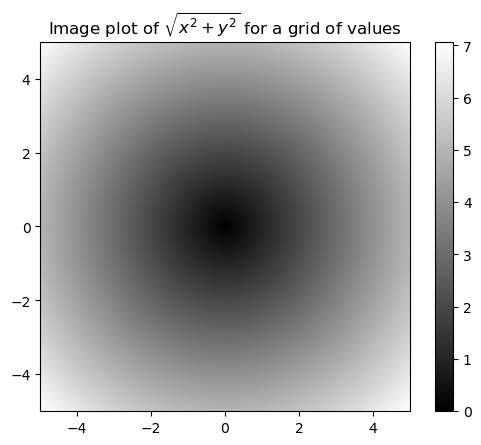

In [27]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points

xs, ys = np.meshgrid(points, points)
display(ys)
z = np.sqrt(xs**2 + ys**2)
display(z)

import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5,5,-5,5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
# plt.close('all')
print('close all open plot windows by executing plt.close("all")')

### Expressing Conditional Logic as Array Operations
**`np.where`**: condition, x: an array or an scalar (if condition), y: an array or scalar (else condition).

In [28]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = [(x if c else y) for x,y,c in zip(xarr, yarr, cond)]
display(result)
print('will not be very fast for large arrays; not work with multidimensional arrays')
result = np.where(cond, xarr, yarr)
display(result)
arr = rng.standard_normal((4, 4))
display(arr, arr>0)
display(np.where(arr>0, 2, -2))
display(np.where(arr>0, 2, arr))

[1.1, 2.2, 1.3, 1.4, 2.5]

will not be very fast for large arrays; not work with multidimensional arrays


array([1.1, 2.2, 1.3, 1.4, 2.5])

array([[ 2.61815943,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089]])

array([[ True,  True,  True, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False,  True, False, False]])

array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

array([[ 2.        ,  2.        ,  2.        , -0.95898831],
       [-1.20938829, -1.41229201,  2.        ,  2.        ],
       [-0.65876032, -1.22867499,  2.        ,  2.        ],
       [-0.13081169,  2.        , -0.09296246, -0.06615089]])

### Mathematical and Statistical Methods

In [29]:
# resume: page - 111